### Import Required Libraries

In [1]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### Load and Preprocess Data

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv("..\knn\Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data['Gender'].replace({'Male':0, 'Female':1}, inplace=True)

C:\Users\ishub\AppData\Local\Temp\ipykernel_22044\1611496895.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].replace({'Male':0, 'Female':1}, inplace=True)
C:\Users\ishub\AppData\Local\Temp\ipykernel_22044\1611496895.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'

In [4]:
x = data.iloc[:, 2:4]
print(x[:5])

y = data.iloc[:, -1]
print(y[:5])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000
0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64
(320, 2)
(80, 2)
(320,)
(80,)


In [5]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# xtrain = scaler.fit_transform(xtrain)
# scaler.fit(xtest)
# xtrain

In [6]:
clf = DecisionTreeClassifier()
clf.fit(xtrain, ytrain)

# Verify fitting
# if hasattr(clf, 'tree_'):
#     print("Tree is fitted properly.")
# else:
#     print("Tree is not fitted.")

DecisionTreeClassifier()

In [7]:
ypred = clf.predict(xtest)

In [8]:
acc = accuracy_score(ytest, ypred)
acc

0.7875

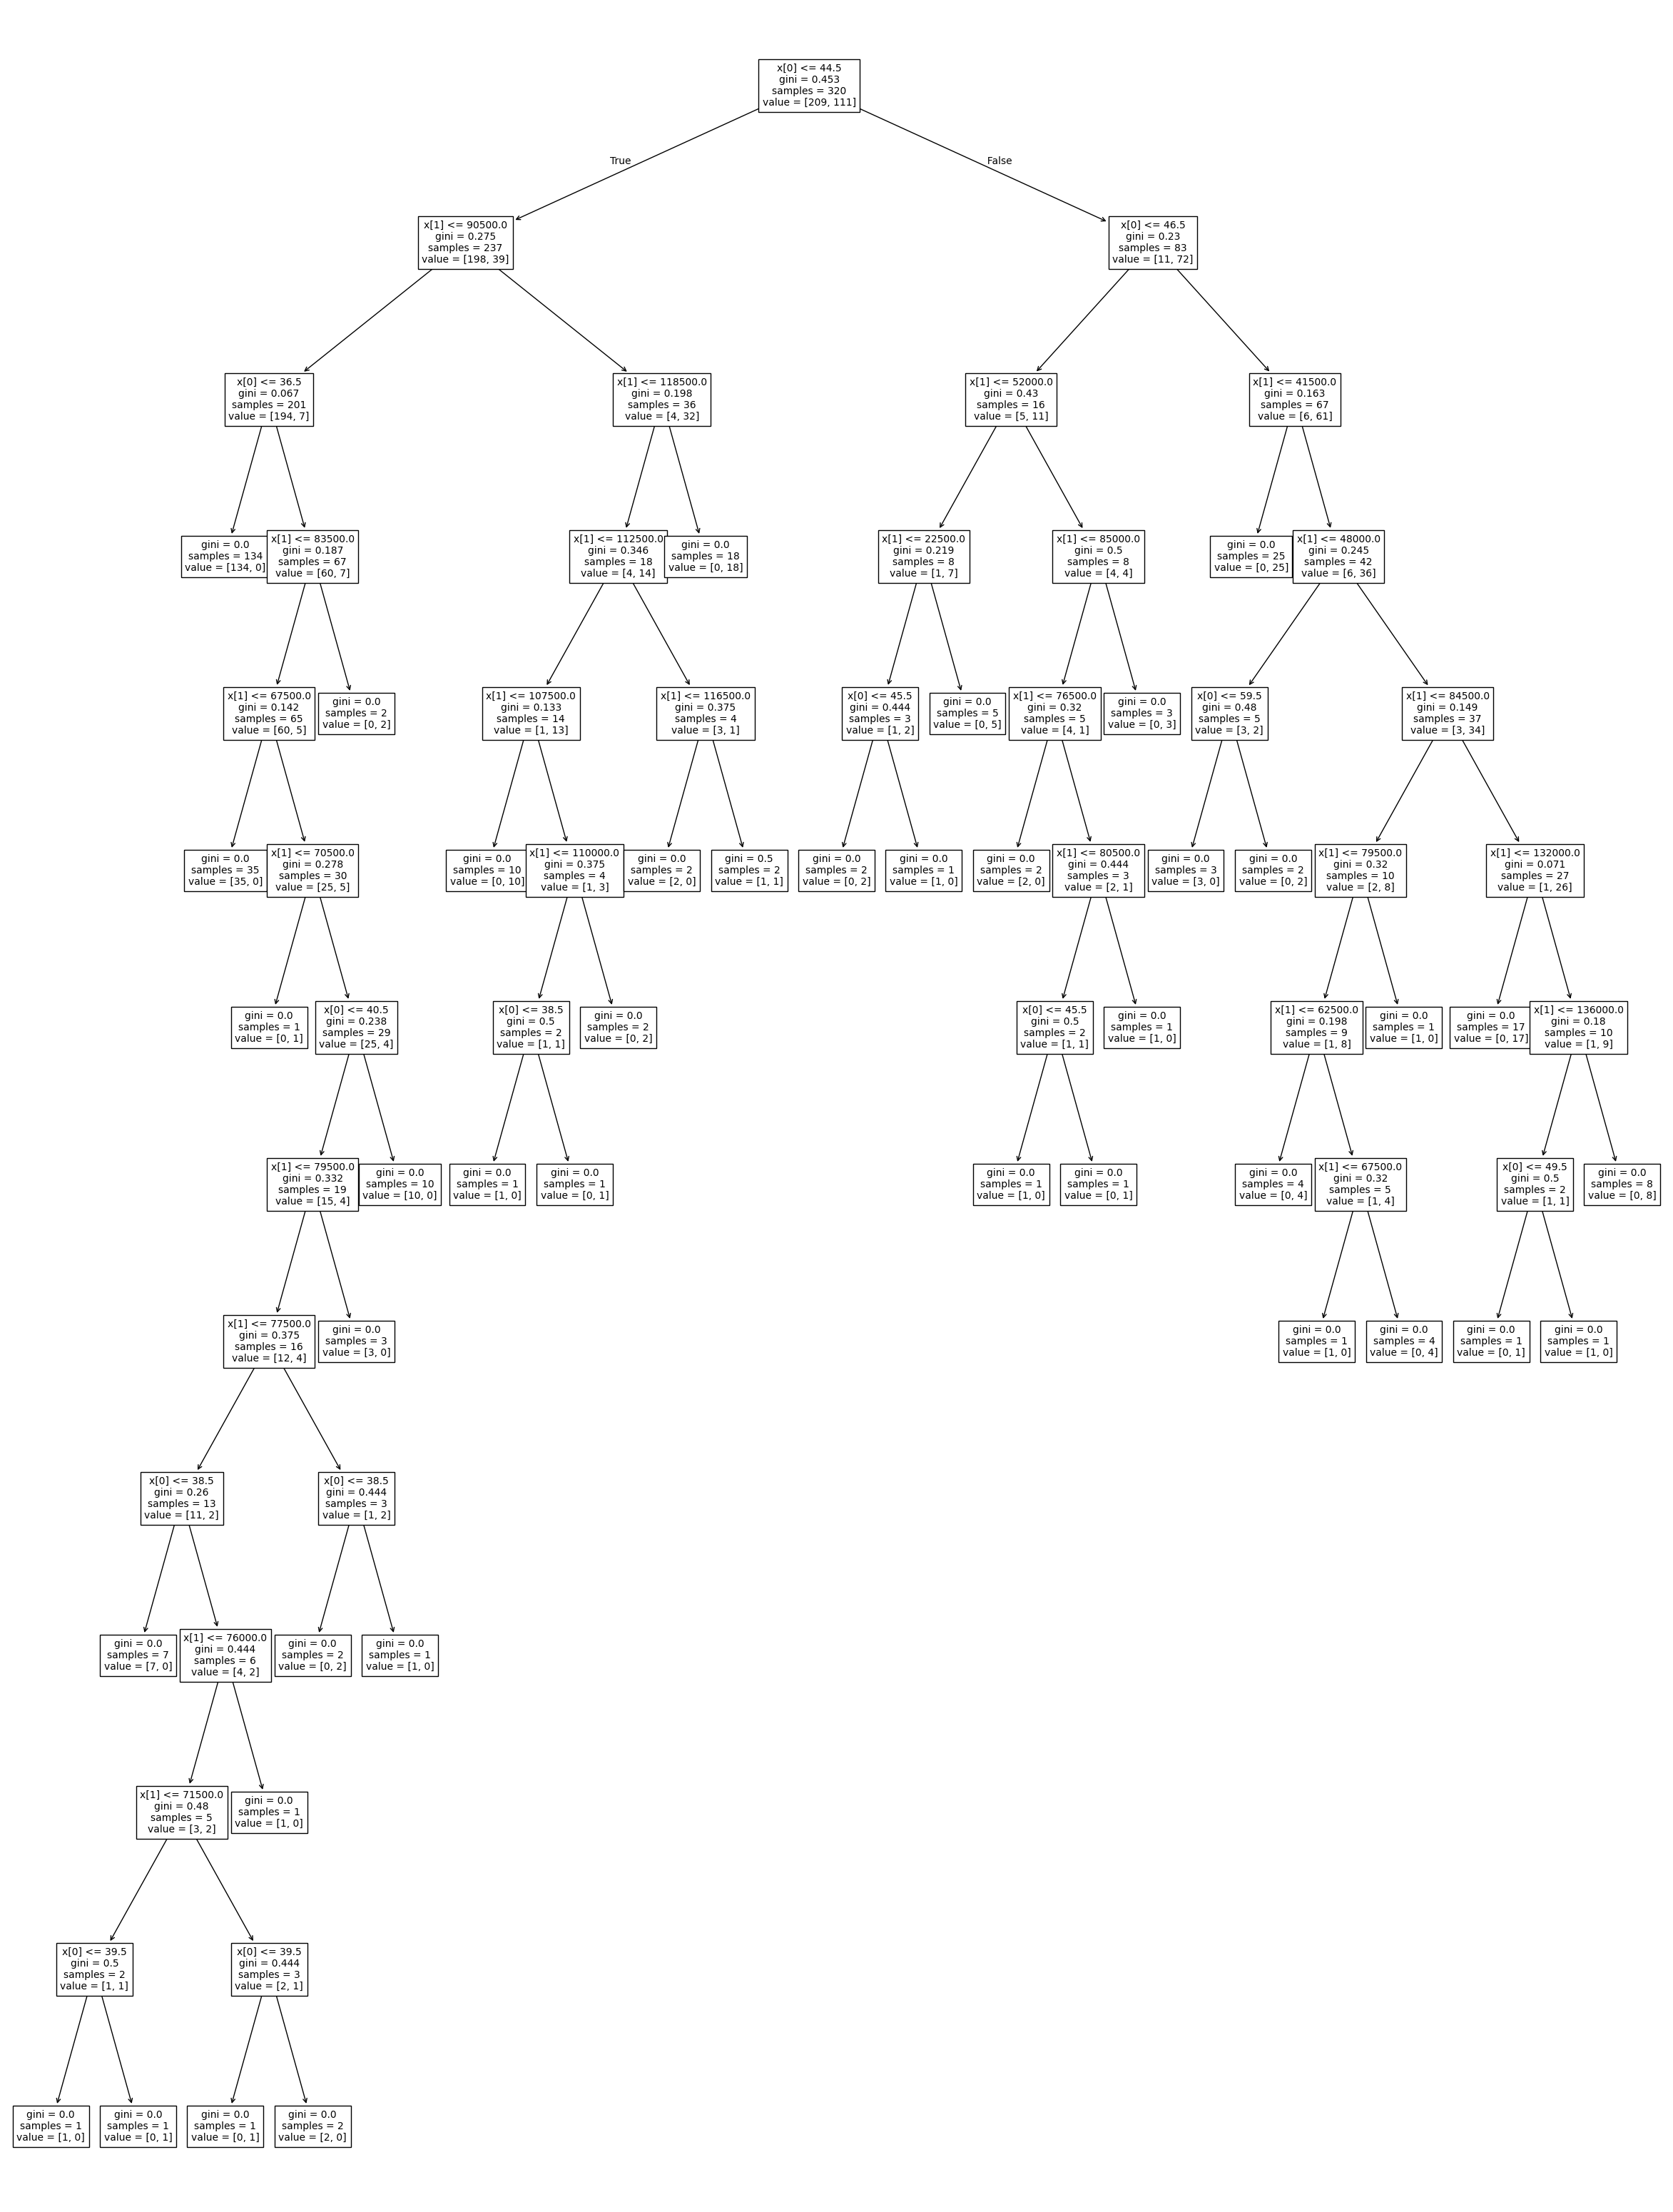

In [9]:
# plot tree
plt.figure(figsize=(30,40))  # set plot size (denoted in inches)
plot_tree(clf, fontsize=10)
plt.show()

In [11]:
a = np.arange(start = xtrain.iloc[:, 0].min()-1 , stop = xtrain.iloc[:, 0].max()+1, step = 0.1)
b = np.arange(start = xtrain.iloc[:, 1].min()-1 , stop = xtrain.iloc[:, 1].max()+1, step = 300)
print(a[0], b[0])
xx, yy = np.meshgrid(a, b)

xx.shape

17.0 14999


(451, 440)

In [12]:
# Input Data of Mesh Grid
input = np.array([xx.ravel(), yy.ravel()]).T
input

array([[1.70000e+01, 1.49990e+04],
       [1.71000e+01, 1.49990e+04],
       [1.72000e+01, 1.49990e+04],
       ...,
       [6.07000e+01, 1.49999e+05],
       [6.08000e+01, 1.49999e+05],
       [6.09000e+01, 1.49999e+05]])

In [14]:
# Prediction of Mesh Grid
results = clf.predict(input)

c:\Users\ishub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [15]:
# Contour expects all the arrays to be of same shape
print(xx.shape, yy.shape, results.shape, results.reshape(xx.shape).shape)

(451, 440) (451, 440) (198440,) (451, 440)


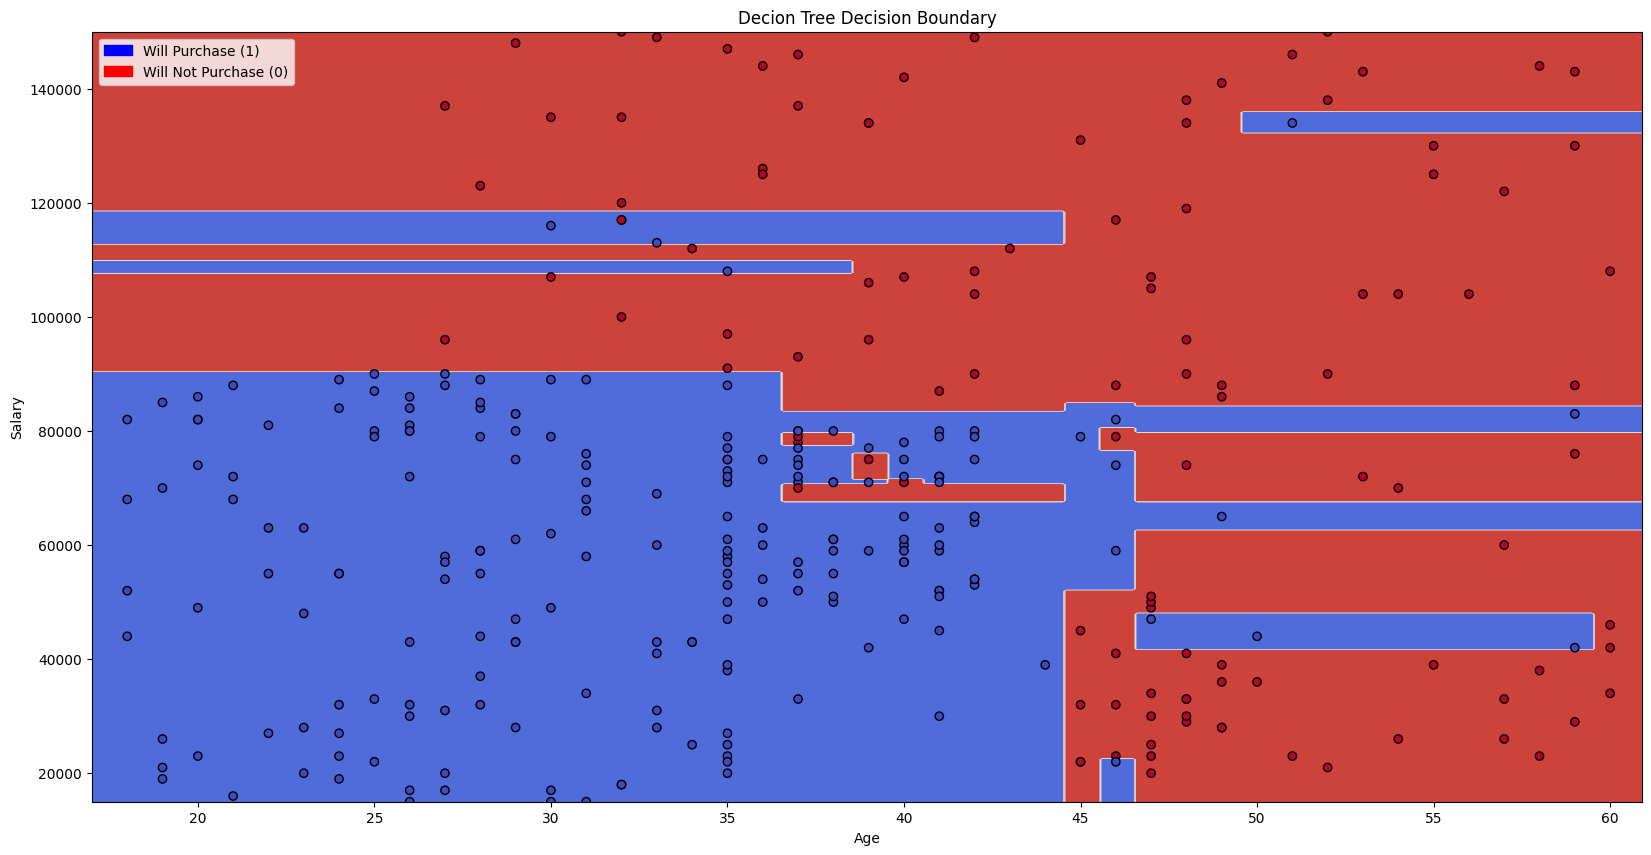

In [17]:
import matplotlib.patches as patches


plt.figure(figsize=(20, 10))
plt.contourf(xx, yy, results.reshape(xx.shape), cmap = 'coolwarm') # Chnage the shape of results to match with xx and yy
plt.scatter(xtrain.iloc[:, 0], xtrain.iloc[:, 1], c=ytrain, cmap='coolwarm', edgecolors='k') 
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Decion Tree Decision Boundary')
# Create custom legend handles
handles = [
    patches.Patch(color='blue', label='Will Purchase (1)'),
    patches.Patch(color='red', label='Will Not Purchase (0)')
]
plt.legend(handles=handles, loc='best')

plt.show()

### Hyper parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [18]:
# define  parameter and possible values
param_dist = {
    'criterion':['gini', 'entropy'],
    'max_depth':[1,2,3,4,5,None],
    'splitter':['best', 'random']
}

In [19]:
# fit gridCV
grid = GridSearchCV(clf, param_grid=param_dist, cv=10, n_jobs=-1)

In [20]:
#train gridCV
grid.fit(xtrain, ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, None],
                         'splitter': ['best', 'random']})

In [21]:
# best score
grid.best_score_

0.91875

In [22]:
# best_parameters0
grid.best_params_

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}